In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('laptop_price1.csv')

In [3]:
df = data

In [4]:
def extract_resolution(row):
    try:
        res = row['ScreenResolution'].split(' ')[-1]
        row['分辨率'] = res
        row['ScreenResolution_修改'] = row['ScreenResolution'].replace(res, '').strip()
        return row
    except:
        row['分辨率'] = None
        row['ScreenResolution_修改'] = row['ScreenResolution'].strip()
        return row


df = df.apply(extract_resolution, axis=1)

In [7]:
df['CPU_Brand'] = df['Cpu'].str.extract('(Intel|AMD)', expand=False)

In [52]:
df[['Memory1', 'Memory2']] = df['Memory'].str.split(' + ', expand=True, n=1)

In [54]:
# 定义一个函数来拆分大小和类型
def split_memory(memory):
    if pd.isna(memory):
        return pd.Series([None, None])
    parts = memory.split(' ', 1)  # 按第一个空格拆分
    if len(parts) == 2:
        return pd.Series(parts)
    return pd.Series([parts[0], None])  # 如果没有类型，返回 None

# 应用函数到 Memory1 和 Memory2
df[['Memory1_Size', 'Memory1_Type']] = df['Memory1'].apply(split_memory)
df[['Memory2_Size', 'Memory2_Type']] = df['Memory2'].apply(split_memory)

In [31]:
print(df['Gpu'].unique())

['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650' 'AMD Radeon R5' 'Intel Iris Pro Graphics'
 'Nvidia GeForce MX150' 'Intel UHD Graphics 620' 'Intel HD Graphics 520'
 'AMD Radeon Pro 555' 'AMD Radeon R5 M430' 'Intel HD Graphics 615'
 'AMD Radeon Pro 560' 'Nvidia GeForce 940MX' 'Intel HD Graphics 400'
 'Nvidia GeForce GTX 1050' 'AMD Radeon R2' 'AMD Radeon 530'
 'Nvidia GeForce 930MX' 'Intel HD Graphics' 'Intel HD Graphics 500'
 'Nvidia GeForce 930MX ' 'Nvidia GeForce GTX 1060' 'Nvidia GeForce 150MX'
 'Intel Iris Graphics 540' 'AMD Radeon RX 580' 'Nvidia GeForce 920MX'
 'AMD Radeon R4 Graphics' 'AMD Radeon 520' 'Nvidia GeForce GTX 1070'
 'Nvidia GeForce GTX 1050 Ti' 'Nvidia GeForce MX130' 'AMD R4 Graphics'
 'Nvidia GeForce GTX 940MX' 'AMD Radeon RX 560' 'Nvidia GeForce 920M'
 'AMD Radeon R7 M445' 'AMD Radeon RX 550' 'Nvidia GeForce GTX 1050M'
 'Intel HD Graphics 515' 'AMD Radeon R5 M420' 'Intel HD Graphic

In [20]:
cpu_scores = {
    5: ['Intel Xeon E3-1535M V6 3GHz', 'Intel Xeon E3-1535M v6 3.1GHz', 'AMD Ryzen 1700 3GHz', 'AMD FX 9830P 3GHz', 'AMD A12-Series 9720P 3.6GHz'],
    4: ['Intel Core i7 8650U 1.9GHz', 'Intel Core i7 7820HK 2.9GHz', 'Intel Core i7 7820HQ 2.9GHz', 'Intel Core i7 7700HQ 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz', 'Intel Core i7 7660U 2.5GHz', 'Intel Core i7 7600U 2.8GHz', 'Intel Core i7 7560U 2.4GHz', 'Intel Core i7 7500U 2.5GHz', 'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 6920HQ 2.9GHz', 'Intel Core i7 6820HQ 2.7GHz', 'Intel Core i7 6820HK 2.7GHz', 'Intel Core i7 6700HQ 2.6GHz', 'Intel Core i7 6600U 2.6GHz', 'Intel Core i7 6500U 2.5GHz', 'Intel Core i7 6500U 2.50GHz', 'AMD Ryzen 1600 3.2GHz', 'AMD A10-Series 9620P 2.5GHz', 'AMD A10-Series A10-9620P 2.5GHz', 'AMD A12-Series 9720P 2.7GHz'],
    3: ['Intel Core i5 7300HQ 2.5GHz', 'Intel Core i5 7300U 2.6GHz', 'Intel Core i5 7200U 2.5GHz', 'Intel Core i5 7200U 2.50GHz', 'Intel Core i5 7200U 2.70GHz', 'Intel Core i5 7200U 2.7GHz', 'Intel Core i5 6440HQ 2.6GHz', 'Intel Core i5 6300HQ 2.3GHz', 'Intel Core i5 6300U 2.4GHz', 'Intel Core i5 6260U 1.8GHz', 'Intel Core i5 6200U 2.3GHz', 'Intel Core i5 2.9GHz', 'Intel Core i5 2.3GHz', 'Intel Core i5 2.0GHz', 'Intel Core i5 1.8GHz', 'Intel Core i5 1.6GHz', 'Intel Core i5 1.3GHz', 'AMD A9-Series 9420 3GHz', 'AMD A9-Series 9420 2.9GHz', 'AMD A8-Series 7410 2.2GHz', 'AMD A6-Series 9220 2.5GHz', 'AMD A6-Series 9220 2.9GHz', 'AMD A6-Series 7310 2GHz'],
    2: ['Intel Core i3 7130U 2.7GHz', 'Intel Core i3 7100U 2.4GHz', 'Intel Core i3 6100U 2.3GHz', 'Intel Core i3 6100U 2.1GHz', 'Intel Core i3 6006U 2.2GHz', 'Intel Core i3 6006U 2.0GHz', 'Intel Core M m7-6Y75 1.2GHz', 'Intel Core M m3-7Y30 2.2GHz', 'Intel Core M m3 1.2GHz', 'Intel Core M 7Y30 1.0GHz', 'Intel Core M 6Y75 1.2GHz', 'Intel Core M 6Y54 1.1GHz', 'Intel Core M 1.2GHz', 'Intel Core M 1.1GHz', 'Intel Celeron Dual Core N3350 2.0GHz', 'Intel Celeron Dual Core N3350 2GHz', 'Intel Celeron Dual Core N3060 1.60GHz', 'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Celeron Dual Core 3855U 1.6GHz', 'Intel Celeron Dual Core 3205U 1.5GHz', 'AMD E-Series E2-9000e 1.5GHz', 'AMD E-Series E2-9000 2.2GHz', 'AMD E-Series 9000e 1.5GHz', 'AMD E-Series 7110 1.8GHz', 'AMD E-Series 6110 1.5GHz', 'AMD A9-Series A9-9420 3GHz', 'AMD A6-Series A6-9220 2.5GHz', 'AMD A4-Series 7210 2.2GHz'],
    1: ['Intel Atom x5-Z8550 1.44GHz', 'Intel Atom x5-Z8350 1.44GHz', 'Intel Atom x5-Z8300 1.44GHz', 'Intel Atom x5-Z8350 1.92GHz', 'Intel Atom Z8350 1.92GHz', 'Intel Pentium Quad Core N4200 1.1GHz', 'Intel Pentium Quad Core N3710 1.6GHz', 'Intel Pentium Quad Core N3700 1.6GHz', 'Intel Pentium Dual Core N4200 1.1GHz', 'Intel Pentium Dual Core 4405Y 1.5GHz', 'Intel Pentium Dual Core 4405U 2.1GHz', 'Intel Celeron Quad Core N3450 1.1GHz', 'Intel Celeron Quad Core N3160 1.6GHz', 'Intel Celeron Quad Core N3710 1.6GHz', 'Intel Celeron Dual Core N3050 1.6GHz', 'Samsung Cortex A72&A53 2.0GHz', 'AMD E-Series E2-6110 1.5GHz', 'AMD A12-Series 9700P 2.5GHz', 'AMD A10-Series 9600P 2.4GHz', 'AMD A6-Series A6-9220 2.2GHz', 'Intel Core i5 7440HQ 2.8GHz', 'Intel Core i5 7Y57 1.2GHz', 'Intel Core i5 6440HQ 2.6GHz', 'Intel Core i5 6260U 1.8GHz', 'Intel Core i5 2.9GHz', 'Intel Core i5 2.0GHz', 'Intel Core i5 1.6GHz', 'Intel Core i5 1.3GHz', 'Intel Core i3 6006U 2.0GHz', 'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Celeron Dual Core 3205U 1.5GHz', 'AMD A12-Series 9700P 2.5GHz', 'AMD A10-Series 9600P 2.4GHz', 'AMD A6-Series A6-9220 2.2GHz']
}

# 创建 CPU_Rank 列
for score, cpus in cpu_scores.items():
    df.loc[df['Cpu'].isin(cpus), 'CPU_Rank'] = score


In [43]:
cpu_scores = {
    5: ['Intel Xeon E3-1535M v5 2.9GHz','Intel Xeon E3-1535M V6 3GHz', 'Intel Xeon E3-1535M v6 3.1GHz', 'AMD Ryzen 1700 3GHz', 'AMD FX 9830P 3GHz', 'AMD A12-Series 9720P 3.6GHz'],
    4: ['Intel Core i7 8550U 1.8GHz','Intel Core i7 8650U 1.9GHz', 'Intel Core i7 7820HK 2.9GHz', 'Intel Core i7 7820HQ 2.9GHz', 'Intel Core i7 7700HQ 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz', 'Intel Xeon E3-1505M V6 3GHz', 'Intel Core i7 6560U 2.2GHz', 'Intel Core i7 2.9GHz', 'Intel Core i7 2.8GHz'],
    3: ['Intel Core i5 8250U 1.6GHz','Intel Core i5 7300HQ 2.5GHz', 'Intel Core i5 7300U 2.6GHz', 'Intel Core i5 7200U 2.5GHz', 'Intel Core i5 7200U 2.50GHz', 'Intel Core i5 7200U 2.70GHz', 'Intel Core i5 7200U 2.7GHz', 'Intel Core i5 3.1GHz', 'Intel Core i5 7500U 2.7GHz', 'AMD FX 8800P 2.1GHz', 'AMD A9-Series 9410 2.9GHz'],
    2: ['Intel Core i3 7130U 2.7GHz', 'Intel Core i3 7100U 2.4GHz', 'Intel Core i3 6100U 2.3GHz', 'Intel Core i3 6100U 2.1GHz', 'Intel Core i3 6006U 2GHz'],
    1: ['AMD E-Series 9000 2.2GHz','Intel Atom x5-Z8550 1.44GHz', 'Intel Atom x5-Z8350 1.44GHz', 'Intel Atom x5-Z8300 1.44GHz', 'Intel Atom x5-Z8350 1.92GHz', 'Intel Celeron Dual Core N3350 1.1GHz', 'Intel Atom X5-Z8350 1.44GHz', 'Intel Core M M3-6Y30 0.9GHz', 'Intel Core M M7-6Y75 1.2GHz', 'Intel Core M 6Y30 0.9GHz', 'Intel Core i7 2.2GHz', 'Intel Core i7 2.7GHz', 'Intel Core i5 7Y54 1.2GHz', 'Intel Core i7 7Y75 1.3GHz']
}

# 更新 DataFrame 中 CPU_Rank 列的值
df.loc[df['Cpu'].isin(cpu_scores[5]), 'CPU_Rank'] = 5
df.loc[df['Cpu'].isin(cpu_scores[4]), 'CPU_Rank'] = 4
df.loc[df['Cpu'].isin(cpu_scores[3]), 'CPU_Rank'] = 3
df.loc[df['Cpu'].isin(cpu_scores[2]), 'CPU_Rank'] = 2
df.loc[df['Cpu'].isin(cpu_scores[1]), 'CPU_Rank'] = 1

In [32]:
gpu_scores = {
    5: ['Nvidia GeForce GTX 1080', 'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1060', 'Nvidia GeForce GTX 1050 Ti', 'Nvidia GeForce GTX 1050', 'Nvidia Quadro M2200', 'Nvidia Quadro M2000M', 'Nvidia Quadro M1200', 'Nvidia Quadro M3000M', 'Nvidia Quadro M1000M', 'AMD Radeon RX 580', 'AMD Radeon RX 560', 'AMD Radeon RX 550', 'AMD Radeon Pro 560', 'AMD Radeon Pro 555', 'AMD Radeon Pro 560'],
    4: ['Nvidia GeForce GTX 980M', 'Nvidia GeForce GTX 970M', 'Nvidia GeForce GTX 965M', 'Nvidia GeForce GTX 960M', 'Nvidia GeForce GTX 950M', 'Nvidia GeForce 940MX', 'Nvidia GeForce 930MX', 'Nvidia Quadro M2200M', 'Nvidia Quadro M620', 'Nvidia Quadro M620M', 'AMD Radeon R9 M385', 'AMD Radeon R7 M465', 'AMD Radeon R7 M445', 'AMD Radeon R7 M440', 'AMD Radeon R7 M360', 'AMD Radeon R5 M430', 'AMD Radeon R5 M420', 'AMD Radeon R5 M420X', 'AMD Radeon Pro 455'],
    3: ['Nvidia GeForce 940M', 'Nvidia GeForce 930M', 'Nvidia GeForce 920MX', 'Nvidia GeForce 920M', 'Nvidia GeForce GT 940MX', 'Nvidia Quadro M500M', 'Nvidia Quadro M520M', 'Nvidia Quadro 3000M', 'AMD Radeon R7 M365X', 'AMD Radeon R7 M460', 'AMD Radeon R5 M330', 'AMD Radeon R5 M315', 'AMD Radeon R5 520', 'AMD Radeon R5 430', 'AMD Radeon R4', 'AMD Radeon R4 Graphics', 'AMD Radeon R2', 'AMD Radeon R2 Graphics'],
    2: ['Intel Iris Plus Graphics 650', 'Intel Iris Plus Graphics 640', 'Intel Iris Pro Graphics', 'Intel Iris Graphics 550', 'Intel Iris Graphics 540', 'Intel HD Graphics 630', 'Intel HD Graphics 620', 'Intel HD Graphics 615', 'Intel HD Graphics 605', 'Intel HD Graphics 600', 'Intel HD Graphics 540', 'Intel HD Graphics 530', 'Intel HD Graphics 520', 'Intel HD Graphics 515', 'Intel HD Graphics 510', 'Intel HD Graphics 505', 'Intel HD Graphics 500', 'Intel HD Graphics 400', 'Intel HD Graphics 405', 'Intel HD Graphics'],
    1: ['Intel UHD Graphics 620', 'Intel Graphics 620', 'Intel HD Graphics 6000', 'Intel HD Graphics 5300', 'AMD Radeon R7', 'AMD Radeon R5', 'AMD Radeon R4 Graphics', 'AMD Radeon 540', 'AMD Radeon 530', 'AMD Radeon 520', 'AMD R17M-M1-70', 'AMD FirePro W6150M', 'AMD FirePro W5130M', 'AMD FirePro W4190M', 'ARM Mali T860 MP4']
}

# 更新 DataFrame 中 GPU_Rank 列的值
df.loc[df['Gpu'].isin(gpu_scores[5]), 'GPU_Rank'] = 5
df.loc[df['Gpu'].isin(gpu_scores[4]), 'GPU_Rank'] = 4
df.loc[df['Gpu'].isin(gpu_scores[3]), 'GPU_Rank'] = 3
df.loc[df['Gpu'].isin(gpu_scores[2]), 'GPU_Rank'] = 2
df.loc[df['Gpu'].isin(gpu_scores[1]), 'GPU_Rank'] = 1


In [49]:
gpu_scores = {
    5: ['Nvidia GeForce GTX 960<U+039C>', 'Nvidia GeForce GTX 1050Ti','Nvidia GeForce GTX1080', 'Nvidia GeForce GTX1050 Ti', 'Nvidia GeForce GTX 960', 'Nvidia GeForce GTX1060', 'Nvidia GeForce GTX 980 '],
    4: ['Nvidia GeForce MX150', 'Nvidia GeForce GTX 940MX', 'Nvidia GeForce GTX 1050M', 'Nvidia GTX 980 SLI', 'Nvidia GeForce GTX 940M', 'Nvidia GeForce GTX 1070M', 'Nvidia GeForce 960M'],
    3: ['Nvidia GeForce 930MX ', 'Nvidia GeForce 150MX', 'Nvidia GeForce 920MX ', 'Nvidia GeForce 920', 'Nvidia GeForce GTX 930MX', 'Nvidia GeForce GTX1050Ti'],
    2: ['AMD R4 Graphics', 'AMD Radeon RX 540', 'AMD Radeon R7 Graphics', 'Intel HD Graphics 620 '],
    1: ['Nvidia GeForce MX130', 'AMD FirePro W4190M ', 'AMD Radeon R3']
}

# 更新 DataFrame 中 GPU_Rank 列的值
df.loc[df['Gpu'].isin(gpu_scores[5]), 'GPU_Rank'] = 5
df.loc[df['Gpu'].isin(gpu_scores[4]), 'GPU_Rank'] = 4
df.loc[df['Gpu'].isin(gpu_scores[3]), 'GPU_Rank'] = 3
df.loc[df['Gpu'].isin(gpu_scores[2]), 'GPU_Rank'] = 2
df.loc[df['Gpu'].isin(gpu_scores[1]), 'GPU_Rank'] = 1

In [60]:
columns_to_drop = ['Memory_Size', 'Memory_Type', 'Memory', 'Gpu', 'ScreenResolution', 'Cpu']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [64]:
columns_to_drop = ['Memory1','Memory2']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [71]:
columns_to_drop = ['laptop_ID']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [66]:
df.rename(columns={'ScreenResolution_修改': 'Screen'}, inplace=True)

In [69]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [72]:
df

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,分辨率,Screen,CPU_Brand,CPU_Rank,GPU_Rank,Memory1_Size,Memory1_Type,Memory2_Size,Memory2_Type
0,Apple,MacBook Pro,Ultrabook,13.3,8GB,macOS,1.37,1339.69,2560x1600,IPS Panel Retina Display,Intel,3.0,2.0,128GB,SSD,None,None
1,Apple,Macbook Air,Ultrabook,13.3,8GB,macOS,1.34,898.94,1440x900,,Intel,3.0,1.0,128GB,Flash Storage,None,None
2,HP,250 G6,Notebook,15.6,8GB,No OS,1.86,575.00,1920x1080,Full HD,Intel,3.0,2.0,256GB,SSD,None,None
3,Apple,MacBook Pro,Ultrabook,15.4,16GB,macOS,1.83,2537.45,2880x1800,IPS Panel Retina Display,Intel,1.0,4.0,512GB,SSD,None,None
4,Apple,MacBook Pro,Ultrabook,13.3,8GB,macOS,1.37,1803.60,2560x1600,IPS Panel Retina Display,Intel,3.0,2.0,256GB,SSD,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4GB,Windows 10,1.80,638.00,1920x1080,IPS Panel Full HD / Touchscreen,Intel,4.0,2.0,128GB,SSD,None,None
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16GB,Windows 10,1.30,1499.00,3200x1800,IPS Panel Quad HD+ / Touchscreen,Intel,4.0,2.0,512GB,SSD,None,None
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2GB,Windows 10,1.50,229.00,1366x768,,Intel,1.0,2.0,64GB,Flash Storage,None,None
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6GB,Windows 10,2.19,764.00,1366x768,,Intel,4.0,3.0,1TB,HDD,None,None


In [73]:
df.to_csv('laptop_data.csv', index=False)

In [75]:
df[['Company','Price_euros']]

,Company,Price_euros
0,Apple,1339.69
1,Apple,898.94
2,HP,575.00
3,Apple,2537.45
4,Apple,1803.60
...,...,...
1298,Lenovo,638.00
1299,Lenovo,1499.00
1300,Lenovo,229.00
1301,HP,764.00


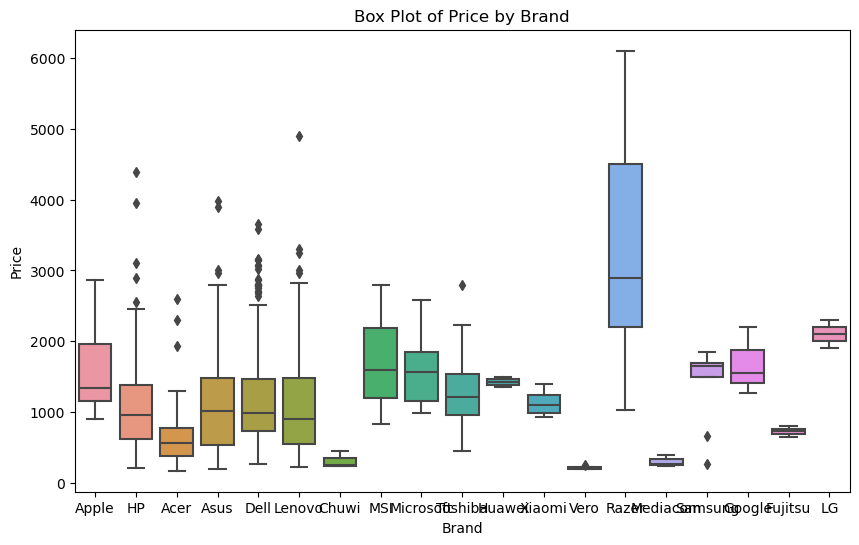

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Price_euros', data=df)
plt.title('Box Plot of Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()